In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
sns.set()

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train 2.csv to train 2.csv


In [3]:
data=pd.read_csv("train 2.csv")
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
data.shape

(913000, 4)

In [5]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [6]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [7]:
data.groupby('store').agg({'item':'count'})

,item
store,
1,91300
2,91300
3,91300
4,91300
5,91300
6,91300
7,91300
8,91300
9,91300


In [8]:
data.groupby('store').agg({'sales':'mean'}).sort_values('sales', ascending=False)

,sales
store,
2,67.033165
8,64.142048
3,59.530602
10,58.709288
9,55.049025
4,54.902946
1,47.268379
5,39.770164
6,39.733516


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [10]:
item=data[data['item']==1]
item

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
18255,2017-12-27,10,1,19
18256,2017-12-28,10,1,12
18257,2017-12-29,10,1,23
18258,2017-12-30,10,1,26


In [11]:
item_1=pd.DataFrame(item.groupby(['date'])['sales'].sum())
item_1

,sales
date,
2013-01-01,133
2013-01-02,99
2013-01-03,127
2013-01-04,145
2013-01-05,149
...,...
2017-12-27,154
2017-12-28,178
2017-12-29,207


In [12]:
item_1.reset_index(inplace=True)

In [13]:
item_1['date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', ..., '2017-12-29',
       '2017-12-30', '2017-12-31'], dtype=object)

In [14]:
import plotly.express as px
fig = px.line(item_1, x='date', y='sales')
fig.show()

In [15]:
fig.update_xaxes(

    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.update_layout(
    title={
        'text':'ITEM 2',
        'y':0.95,
        'x':0.5, 
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [16]:
#!pip install pystan
#!pip install fbprophet

In [17]:
from fbprophet import Prophet

In [18]:
item_1['date']=pd.to_datetime(item_1['date'])
item_1.dtypes

date     datetime64[ns]
sales             int64
dtype: object

In [19]:
model=Prophet(interval_width=0.95)

In [20]:
item_1.rename(columns={'date':'dt','sales':'sl'},inplace=True)
item_1

,dt,sl
0,2013-01-01,133
1,2013-01-02,99
2,2013-01-03,127
3,2013-01-04,145
4,2013-01-05,149
...,...,...
1821,2017-12-27,154
1822,2017-12-28,178
1823,2017-12-29,207
1824,2017-12-30,236


In [21]:
m = Prophet(daily_seasonality=False)

In [22]:
item_1.set_index('dt')

,sl
dt,
2013-01-01,133
2013-01-02,99
2013-01-03,127
2013-01-04,145
2013-01-05,149
...,...
2017-12-27,154
2017-12-28,178
2017-12-29,207


In [23]:
item_1=item_1.groupby(pd.Grouper(key='dt', freq='M')).agg({'sl':'mean'})

In [24]:
fig=px.line(item_1, x=item_1.index, y='sl')
fig.show()

In [25]:
quater=pd.DataFrame(item_1.groupby(item_1.index.to_period('Q'))['sl'].sum())
quater

,sl
dt,
2013Q1,427.770737
2013Q2,620.561290
2013Q3,628.444086
2013Q4,514.922581
2014Q1,485.305300
2014Q2,719.075269
2014Q3,727.418280
2014Q4,589.926882
2015Q1,512.141705


In [26]:
new=pd.DataFrame({'date':data[data['item'] == 1]['date']})
new

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
18255,2017-12-27
18256,2017-12-28
18257,2017-12-29
18258,2017-12-30


In [27]:
for i in range(1,51):
  item=data[data['item']==i]['sales']
  item=item.reset_index(drop=True)
  new['item_'+str(i)]=item
new

,date,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
0,2013-01-01,13,33,15,10,11,31,25,33,18,37,37,33,37,22,42,14,13,38,15,22,22,59,14,41,59,16,14,49,34,17,30,22,37,23,28,49,16,21,25,19,6,21,22,20,37,30,17,21,18,30
1,2013-01-02,11,43,30,11,6,36,23,37,23,34,43,35,31,35,33,11,18,51,18,16,28,29,17,25,26,26,10,39,30,25,19,22,30,6,26,48,13,28,23,15,15,24,27,15,40,30,15,26,10,32
2,2013-01-03,14,23,14,8,8,18,34,38,25,32,34,41,50,26,45,12,15,42,20,24,23,33,5,32,42,31,12,57,35,25,33,30,40,15,38,45,12,40,29,12,5,14,19,11,42,30,5,25,17,25
3,2013-01-04,13,18,10,19,9,19,36,54,22,45,52,45,45,32,39,15,19,50,16,24,15,45,16,36,35,25,18,46,46,27,24,24,48,13,38,41,23,45,31,13,9,22,29,22,49,37,13,26,22,32
4,2013-01-05,10,34,23,12,8,31,38,51,29,35,45,46,49,31,47,22,16,56,19,36,18,32,23,31,45,27,13,45,43,22,32,28,31,15,45,48,23,38,29,19,13,18,34,19,52,28,12,28,15,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18255,2017-12-27,19,43,32,16,19,47,47,60,44,72,74,59,82,50,72,17,26,59,32,33,37,59,25,56,65,45,20,82,63,40,54,42,52,19,56,69,29,65,25,34,14,35,41,22,64,50,16,52,24,63
18256,2017-12-28,12,35,33,29,14,72,53,65,39,81,61,65,75,62,88,28,42,76,30,49,39,70,26,57,72,42,27,81,58,29,63,41,61,29,55,89,34,73,40,30,18,37,47,30,79,48,21,36,29,59
18257,2017-12-29,23,53,39,22,20,59,56,65,58,69,79,74,89,40,101,24,32,85,31,45,37,89,34,73,93,51,16,98,75,39,58,41,79,24,65,76,33,103,43,33,26,37,52,30,72,69,18,59,26,74
18258,2017-12-30,26,56,34,15,21,52,60,81,58,86,77,81,80,57,94,36,36,96,37,45,43,91,35,85,73,49,28,99,85,41,61,40,75,21,55,84,31,76,45,29,22,44,58,30,76,72,10,54,40,62


In [28]:
new=new.groupby(['date']).sum()
new

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20,item_21,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,133,327,172,102,83,288,278,416,245,378,369,369,444,310,453,144,171,415,208,265,222,459,146,349,447,211,111,456,351,219,337,237,384,149,350,431,157,381,248,179,103,195,253,154,396,319,116,277,159,330
2013-01-02,99,279,213,110,81,310,291,386,225,397,396,326,434,363,442,136,181,419,208,235,242,450,163,324,432,260,134,474,360,202,323,215,345,116,345,391,151,432,225,145,132,215,255,165,393,316,118,281,159,384
2013-01-03,127,304,193,112,96,309,324,398,265,388,398,384,455,337,487,137,207,470,230,260,243,431,121,317,481,296,120,519,413,237,305,259,388,164,316,443,158,437,254,172,131,215,306,170,459,325,104,280,187,356
2013-01-04,145,359,218,138,108,343,335,430,313,462,460,435,474,371,533,141,195,513,238,269,246,465,173,368,450,303,135,527,406,278,368,261,415,150,389,466,174,494,284,184,122,224,323,189,450,351,128,296,184,394
2013-01-05,149,377,217,144,100,343,377,481,319,449,417,438,493,366,604,145,172,544,260,277,243,459,212,364,510,298,118,575,468,255,356,240,414,145,448,453,189,509,283,174,142,243,309,202,533,360,133,344,179,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,154,500,282,172,148,406,457,579,387,546,576,551,689,468,670,185,262,696,305,395,328,596,233,475,665,395,173,680,520,313,469,349,505,204,530,630,215,592,313,256,176,264,381,233,681,487,171,374,231,511
2017-12-28,178,495,298,190,157,506,499,644,420,609,589,593,736,522,675,201,271,704,337,387,330,672,248,555,680,397,194,743,531,330,484,391,578,203,499,664,249,693,362,264,172,346,415,248,707,473,188,395,276,587
2017-12-29,207,515,332,192,177,530,532,648,494,617,657,654,736,513,778,213,306,744,343,433,378,758,258,599,718,412,181,776,655,345,557,422,569,207,585,727,273,782,400,275,185,304,457,277,724,548,213,496,237,596


In [29]:
len(new)

1826

In [30]:
agg_data={'date':[],'sales':[]}
for i in range(len(new)):
  if len(new[i:i+90]) == 90:
    agg_data['date'].append(new.index[i])
    agg_data['sales'].append(new.item_1[i:i+90].sum())

In [31]:
agg_data=pd.DataFrame(agg_data)
agg_data.head()

,date,sales
0,2013-01-01,12847
1,2013-01-02,12848
2,2013-01-03,12936
3,2013-01-04,13019
4,2013-01-05,13103


In [32]:
fig=px.line(agg_data, x='date', y='sales')
fig.show()

In [33]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1737 non-null   object
 1   sales   1737 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.3+ KB


In [34]:
agg_data.describe()

,sales
count,1737.000000
mean,19994.468624
std,3619.226663
min,12847.000000
25%,17053.000000
50%,19795.000000
75%,22976.000000
max,26998.000000


In [35]:
agg_data.isnull().sum()

date     0
sales    0
dtype: int64

In [36]:
agg_data['date'].dtype

dtype('O')

In [37]:
agg_data.columns

Index(['date', 'sales'], dtype='object')

In [38]:
agg_data.shape

(1737, 2)

In [39]:
agg_data['date']=pd.to_datetime(agg_data['date'], format='%Y-%m-%d')
agg_data

,date,sales
0,2013-01-01,12847
1,2013-01-02,12848
2,2013-01-03,12936
3,2013-01-04,13019
4,2013-01-05,13103
...,...,...
1732,2017-09-29,20796
1733,2017-09-30,20704
1734,2017-10-01,20642
1735,2017-10-02,20578


In [40]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1737 non-null   datetime64[ns]
 1   sales   1737 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 27.3 KB


In [41]:
agg_data['Year'] = agg_data.date.dt.year
agg_data

,date,sales,Year
0,2013-01-01,12847,2013
1,2013-01-02,12848,2013
2,2013-01-03,12936,2013
3,2013-01-04,13019,2013
4,2013-01-05,13103,2013
...,...,...,...
1732,2017-09-29,20796,2017
1733,2017-09-30,20704,2017
1734,2017-10-01,20642,2017
1735,2017-10-02,20578,2017


In [42]:
agg_data['Month'] = agg_data.date.dt.month
agg_data

,date,sales,Year,Month
0,2013-01-01,12847,2013,1
1,2013-01-02,12848,2013,1
2,2013-01-03,12936,2013,1
3,2013-01-04,13019,2013,1
4,2013-01-05,13103,2013,1
...,...,...,...,...
1732,2017-09-29,20796,2017,9
1733,2017-09-30,20704,2017,9
1734,2017-10-01,20642,2017,10
1735,2017-10-02,20578,2017,10


In [43]:
agg_data.tail()

,date,sales,Year,Month
1732,2017-09-29,20796,2017,9
1733,2017-09-30,20704,2017,9
1734,2017-10-01,20642,2017,10
1735,2017-10-02,20578,2017,10
1736,2017-10-03,20610,2017,10


In [44]:
agg_data.head()

,date,sales,Year,Month
0,2013-01-01,12847,2013,1
1,2013-01-02,12848,2013,1
2,2013-01-03,12936,2013,1
3,2013-01-04,13019,2013,1
4,2013-01-05,13103,2013,1


In [45]:
X = agg_data.loc[(agg_data['date'] < '2017-01-01'), :]
Y = agg_data.loc[(agg_data['date'] >= '2017-01-01') & (agg_data['date'] < '2017-04-01'), :]
cols = [col for col in X.columns if col not in ['date', 'id', 'sales', 'year']]
X_train = X[cols]
y_train = X['sales']
X_test = Y[cols]
y_test = Y['sales']

y_train.shape, X_train.shape, X_test.shape, y_test.shape

((1461,), (1461, 2), (90, 2), (90,))

In [49]:
agg_data['date'].dtype

dtype('<M8[ns]')

In [50]:
import numpy as np
import pandas as pd
import datetime as dt
agg_data['date'] = pd.to_datetime(agg_data['date'])
agg_data['date'] = agg_data['date'].map(dt.datetime.toordinal)

In [52]:
agg_data.head()

,date,sales,Year,Month
0,734869,12847,2013,1
1,734870,12848,2013,1
2,734871,12936,2013,1
3,734872,13019,2013,1
4,734873,13103,2013,1


In [53]:
agg_data['date'].dtype

dtype('int64')

In [55]:
X = agg_data['date']
Y=agg_data['sales']

In [56]:
X = agg_data.iloc[:, :-1].values
Y = agg_data.iloc[:, :-1].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [62]:
r_sq=regressor.score(X, Y)
print(r_sq)

1.0


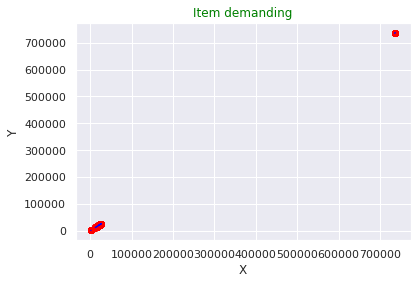

In [66]:
import matplotlib.pyplot as plt
Y_pred = regressor.predict(X) 
plt.scatter(X, Y,color='red')
plt.plot(X, Y_pred, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Item demanding',color='green')
plt.show()

In [68]:
regressor.coef_

array([[ 1.00000000e+00,  9.68872318e-18,  1.89683530e-15],
       [-5.19555549e-15,  1.00000000e+00, -1.77348262e-13],
       [ 3.59637633e-16, -2.84060969e-17,  1.00000000e+00]])

In [69]:
regressor.intercept_

array([ 1.16415322e-10,  4.16184776e-09, -2.64435585e-10])